In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [86]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [87]:
NUM_CLASSES = 32

# Dataset reading

In [88]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [89]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [91]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [92]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │             352 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,422 (5.55 KB)

 Trainable params: 1,422 (5.55 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [94]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [95]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
59/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0489 - loss: 3.4800 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0646 - loss: 3.4424 - val_accuracy: 0.1399 - val_loss: 3.3715
Epoch 2/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1015 - loss: 3.3392 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1177 - loss: 3.3008 - val_accuracy: 0.1692 - val_loss: 3.1532
Epoch 3/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1406 - loss: 3.1623 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1527 - loss: 3.0997 - val_accuracy: 0.2434 - val_loss: 2.8589
Epoch 4/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1620 - loss: 2.9510 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1752 - loss: 2.8786 - val_accuracy: 0.2838 - val_loss: 2.5924
Epoch 5/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1974 - loss: 2.7259 
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2045 - loss: 2.6928 - val_accuracy: 0.3300 - val_loss: 2.3459
Epoch 6/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2210 - loss: 2.5672 
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2341 - loss: 2.5250 - val_accuracy: 0.3866 - val_loss: 2.1306
Epoch 7/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2532 - loss: 2.3943 
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2567 - loss: 2.3768 - val_accuracy: 0.4626 - val_loss: 1.9704
Epoch 8/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2710 - loss: 2.2756 
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2696 - loss: 2.2741 - val_accuracy: 0.4971 - val_loss: 1.8524
Epoch 9/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2743 - loss: 2.2080 
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2788 - loss: 2.1987 - val_accuracy: 0.4960 - val_loss: 1.7618
Epoch 10/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3029 - loss: 2.1432 
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3019 - loss: 2.1375 - val_accuracy: 0.5176 - val_loss: 1.6897
Epoch 11/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3024 - loss: 2.1357 
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3114 - loss: 2.1047 - val_accuracy: 0.5191 - val_loss: 1.6351
Epoch 12/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3236 - loss: 2.0485 
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3210 - loss: 2.0514 - val_accuracy: 0.5584 - val_loss: 1.5750
Epoch 13/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3191 - loss: 2.0202 
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3294 - loss: 2.0036 - val_accuracy: 0.5804 - val_loss: 1.5212
Epoch 14/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3410 - loss: 1.9856 
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3375 - loss: 1.9697 - val_accuracy: 0.5921 - val_loss: 1.4823
Epoch 15/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3505 - loss: 1.9557 
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3486 - loss: 1.9533 - val_accuracy: 0.6230 - val_loss: 1.4500
Epoch 16/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3510 - loss: 1.9398 
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3499 - loss: 1.9302 - val_accuracy: 0.6105 - val_loss: 1.4234
Epoch 17/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3528 - loss: 1.9018 
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3661 - loss: 1.8948 - val_accuracy: 0.6384 - val_loss: 1.3841
Epoch 18/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3597 - loss: 1.8857 
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3713 - loss: 1.8799 - val_accuracy: 0.6197 - val_loss: 1.3639
Epoch 19/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3779 - loss: 1.8476 
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3753 - loss: 1.8495 - val_accuracy: 0.6597 - val_loss: 1.3449
Epoch 20/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3791 - loss: 1.8401 
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3731 - loss: 1.8439 - val_accuracy: 0.6843 - val_loss: 1.3112
Epoch 21/1000
51/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3696 - loss: 1.8298 
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3779 - loss: 1.8300 - val_accuracy: 0.6869 - val_loss: 1.2979
Epoch 22/1000
53/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3905 - loss: 1.7902 
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3902 - loss: 1.8021 - val_accuracy: 0.6872 - val_loss: 1.2790
Epoch 23/1000
54/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3959 - loss: 1.7811 
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3939 - loss: 1.7885 - val_accuracy: 0.7048 - val_loss: 1.2596
Epoch 24/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3807 - loss: 1.8342 
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3842 - loss: 1.8056 - val_accuracy: 0.6795 - val_loss: 1.2360
Epoch 25/1000
53/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3929 - loss: 1.7799 
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3932 - loss: 1.7786 - val_accuracy: 0.7015 - val_loss: 1.2318
Epoch 26/1000
51/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3870 - loss: 1.7824 
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3866 - loss: 1.7745 - val_accuracy: 0.7034 - val_loss: 1.2185
Epoch 27/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3949 - loss: 1.7634 
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4001 - loss: 1.7646 - val_accuracy: 0.7221 - val_loss: 1.2143
Epoch 28/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4217 - loss: 1.7431 
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4142 - loss: 1.7309 - val_accuracy: 0.7236 - val_loss: 1.1934
Epoch 29/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4018 - loss: 1.7268 
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4041 - loss: 1.7337 - val_accuracy: 0.7272 - val_loss: 1.1776
Epoch 30/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4109 - loss: 1.7286 
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4097 - loss: 1.7252 - val_accuracy: 0.7408 - val_loss: 1.1645
Epoch 31/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4061 - loss: 1.7294 
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4057 - loss: 1.7322 - val_accuracy: 0.7232 - val_loss: 1.1588
Epoch 32/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4231 - loss: 1.6949 
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4161 - loss: 1.7167 - val_accuracy: 0.7199 - val_loss: 1.1587
Epoch 33/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4330 - loss: 1.6865 
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4224 - loss: 1.6958 - val_accuracy: 0.7515 - val_loss: 1.1409
Epoch 34/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4103 - loss: 1.7112 
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4140 - loss: 1.6948 - val_accuracy: 0.7680 - val_loss: 1.1412
Epoch 35/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4286 - loss: 1.6698 
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4289 - loss: 1.6682 - val_accuracy: 0.7258 - val_loss: 1.1241
Epoch 36/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4234 - loss: 1.6741 
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4252 - loss: 1.6793 - val_accuracy: 0.7478 - val_loss: 1.1155
Epoch 37/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4261 - loss: 1.6659 
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4212 - loss: 1.6678 - val_accuracy: 0.7269 - val_loss: 1.1069
Epoch 38/1000
54/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4402 - loss: 1.6559 
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4355 - loss: 1.6520 - val_accuracy: 0.7331 - val_loss: 1.0977
Epoch 39/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4267 - loss: 1.6506 
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4310 - loss: 1.6483 - val_accuracy: 0.7482 - val_loss: 1.0891
Epoch 40/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4257 - loss: 1.6558 
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4294 - loss: 1.6508 - val_accuracy: 0.7643 - val_loss: 1.0794
Epoch 41/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4300 - loss: 1.6456 
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4350 - loss: 1.6444 - val_accuracy: 0.7610 - val_loss: 1.0719
Epoch 42/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4366 - loss: 1.6241 
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4360 - loss: 1.6438 - val_accuracy: 0.7324 - val_loss: 1.0786
Epoch 43/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4319 - loss: 1.6463 
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4293 - loss: 1.6594 - val_accuracy: 0.7588 - val_loss: 1.0730
Epoch 44/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4543 - loss: 1.6262 
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4477 - loss: 1.6122 - val_accuracy: 0.7621 - val_loss: 1.0539
Epoch 45/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4315 - loss: 1.6392 
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4383 - loss: 1.6368 - val_accuracy: 0.7441 - val_loss: 1.0682
Epoch 46/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4499 - loss: 1.6293 
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4457 - loss: 1.6126 - val_accuracy: 0.7478 - val_loss: 1.0375
Epoch 47/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4500 - loss: 1.5958 
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4469 - loss: 1.6023 - val_accuracy: 0.7489 - val_loss: 1.0429
Epoch 48/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4450 - loss: 1.6264 
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4479 - loss: 1.6209 - val_accuracy: 0.7907 - val_loss: 1.0426
Epoch 49/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4371 - loss: 1.6271 
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4426 - loss: 1.6178 - val_accuracy: 0.7838 - val_loss: 1.0364
Epoch 50/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4581 - loss: 1.5841 
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4547 - loss: 1.5945 - val_accuracy: 0.7540 - val_loss: 1.0222
Epoch 51/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4466 - loss: 1.6102 
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4470 - loss: 1.5882 - val_accuracy: 0.7504 - val_loss: 1.0125
Epoch 52/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4681 - loss: 1.5867 
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4579 - loss: 1.5814 - val_accuracy: 0.7786 - val_loss: 1.0156
Epoch 53/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4500 - loss: 1.6124 
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4462 - loss: 1.5961 - val_accuracy: 0.7684 - val_loss: 1.0079
Epoch 54/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4450 - loss: 1.6237 
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4507 - loss: 1.5998 - val_accuracy: 0.7654 - val_loss: 1.0050
Epoch 55/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4584 - loss: 1.5686 
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4569 - loss: 1.5766 - val_accuracy: 0.7794 - val_loss: 1.0004
Epoch 56/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4517 - loss: 1.6306 
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4491 - loss: 1.6037 - val_accuracy: 0.7871 - val_loss: 0.9981
Epoch 57/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4553 - loss: 1.5777 
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4574 - loss: 1.5790 - val_accuracy: 0.7706 - val_loss: 0.9866
Epoch 58/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4584 - loss: 1.5753 
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4615 - loss: 1.5851 - val_accuracy: 0.7658 - val_loss: 0.9882
Epoch 59/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4726 - loss: 1.5527 
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4590 - loss: 1.5672 - val_accuracy: 0.7757 - val_loss: 0.9849
Epoch 60/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4455 - loss: 1.5924 
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4561 - loss: 1.5819 - val_accuracy: 0.7540 - val_loss: 0.9825
Epoch 61/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4592 - loss: 1.5495 
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4613 - loss: 1.5488 - val_accuracy: 0.7845 - val_loss: 0.9829
Epoch 62/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4643 - loss: 1.5660 
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4637 - loss: 1.5690 - val_accuracy: 0.7735 - val_loss: 0.9718
Epoch 63/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4533 - loss: 1.5757 
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4644 - loss: 1.5735 - val_accuracy: 0.7603 - val_loss: 0.9725
Epoch 64/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4591 - loss: 1.5535 
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4562 - loss: 1.5641 - val_accuracy: 0.7841 - val_loss: 0.9616
Epoch 65/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4717 - loss: 1.5749 
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4723 - loss: 1.5530 - val_accuracy: 0.7489 - val_loss: 0.9595
Epoch 66/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4645 - loss: 1.5407 
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4683 - loss: 1.5479 - val_accuracy: 0.7772 - val_loss: 0.9616
Epoch 67/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4670 - loss: 1.5424 
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4649 - loss: 1.5474 - val_accuracy: 0.8117 - val_loss: 0.9478
Epoch 68/1000
59/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4700 - loss: 1.5306 
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4739 - loss: 1.5346 - val_accuracy: 0.7952 - val_loss: 0.9401
Epoch 69/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4828 - loss: 1.5300 
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4764 - loss: 1.5275 - val_accuracy: 0.7625 - val_loss: 0.9432
Epoch 70/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: 1.5124 
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4732 - loss: 1.5278 - val_accuracy: 0.7988 - val_loss: 0.9361
Epoch 71/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4649 - loss: 1.5332 
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4632 - loss: 1.5453 - val_accuracy: 0.7636 - val_loss: 0.9501
Epoch 72/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4858 - loss: 1.5237 
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4771 - loss: 1.5220 - val_accuracy: 0.8135 - val_loss: 0.9229
Epoch 73/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4742 - loss: 1.5260 
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4725 - loss: 1.5388 - val_accuracy: 0.7904 - val_loss: 0.9237
Epoch 74/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4710 - loss: 1.5380 
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4788 - loss: 1.5223 - val_accuracy: 0.7665 - val_loss: 0.9162
Epoch 75/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4806 - loss: 1.5114 
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4796 - loss: 1.5153 - val_accuracy: 0.8021 - val_loss: 0.9119
Epoch 76/1000
53/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4808 - loss: 1.5321 
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4790 - loss: 1.5253 - val_accuracy: 0.7834 - val_loss: 0.9218
Epoch 77/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4768 - loss: 1.5250 
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4798 - loss: 1.5108 - val_accuracy: 0.7816 - val_loss: 0.9006
Epoch 78/1000
49/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4862 - loss: 1.5092 
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4826 - loss: 1.5204 - val_accuracy: 0.7735 - val_loss: 0.9104
Epoch 79/1000
51/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4921 - loss: 1.4791 
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4880 - loss: 1.4930 - val_accuracy: 0.8007 - val_loss: 0.9033
Epoch 80/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4960 - loss: 1.4948 
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4878 - loss: 1.4876 - val_accuracy: 0.7937 - val_loss: 0.9006
Epoch 81/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4740 - loss: 1.5234 
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4785 - loss: 1.5207 - val_accuracy: 0.8106 - val_loss: 0.9014
Epoch 82/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4845 - loss: 1.5051 
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4808 - loss: 1.5071 - val_accuracy: 0.7926 - val_loss: 0.9076
Epoch 83/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4738 - loss: 1.5017 
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4825 - loss: 1.4898 - val_accuracy: 0.8186 - val_loss: 0.8857
Epoch 84/1000
58/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4802 - loss: 1.4882 
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4859 - loss: 1.4857 - val_accuracy: 0.7834 - val_loss: 0.8818
Epoch 85/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4888 - loss: 1.5072 
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4918 - loss: 1.4979 - val_accuracy: 0.7827 - val_loss: 0.8936
Epoch 86/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4837 - loss: 1.4836 
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4819 - loss: 1.4913 - val_accuracy: 0.8084 - val_loss: 0.8711
Epoch 87/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4874 - loss: 1.5110 
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4824 - loss: 1.5013 - val_accuracy: 0.8172 - val_loss: 0.8733
Epoch 88/1000
59/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4838 - loss: 1.4822 
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4832 - loss: 1.5000 - val_accuracy: 0.7955 - val_loss: 0.8844
Epoch 89/1000
51/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5029 - loss: 1.4468 
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4957 - loss: 1.4656 - val_accuracy: 0.8348 - val_loss: 0.8613
Epoch 90/1000
44/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4831 - loss: 1.4886 
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4862 - loss: 1.4930 - val_accuracy: 0.7915 - val_loss: 0.8675
Epoch 91/1000
47/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 1.4801 
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4942 - loss: 1.4808 - val_accuracy: 0.8183 - val_loss: 0.8720
Epoch 92/1000
50/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4948 - loss: 1.4727 
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4905 - loss: 1.4733 - val_accuracy: 0.8179 - val_loss: 0.8524
Epoch 93/1000
50/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4986 - loss: 1.4437 
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4940 - loss: 1.4576 - val_accuracy: 0.8117 - val_loss: 0.8630
Epoch 94/1000
56/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5051 - loss: 1.4494 
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4966 - loss: 1.4705 - val_accuracy: 0.8014 - val_loss: 0.8659
Epoch 95/1000
56/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5023 - loss: 1.4671 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4979 - loss: 1.4669 - val_accuracy: 0.8073 - val_loss: 0.8590
Epoch 96/1000
45/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4888 - loss: 1.4778 
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4906 - loss: 1.4701 - val_accuracy: 0.8150 - val_loss: 0.8337
Epoch 97/1000
56/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4995 - loss: 1.4578 
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4967 - loss: 1.4559 - val_accuracy: 0.8091 - val_loss: 0.8482
Epoch 98/1000
59/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4989 - loss: 1.4676 
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4979 - loss: 1.4673 - val_accuracy: 0.8014 - val_loss: 0.8497
Epoch 99/1000
56/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4972 - loss: 1.4456 
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4958 - loss: 1.4616 - val_accuracy: 0.8084 - val_loss: 0.8487
Epoch 100/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 1.4643 
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5024 - loss: 1.4532 - val_accuracy: 0.8264 - val_loss: 0.8413
Epoch 101/1000
31/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4953 - loss: 1.4578 
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5032 - loss: 1.4436 - val_accuracy: 0.8253 - val_loss: 0.8458
Epoch 102/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.4452 
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5021 - loss: 1.4534 - val_accuracy: 0.8172 - val_loss: 0.8383
Epoch 103/1000
33/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5164 - loss: 1.4126 
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5031 - loss: 1.4465 - val_accuracy: 0.8054 - val_loss: 0.8494
Epoch 104/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4945 - loss: 1.4723 
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4974 - loss: 1.4615 - val_accuracy: 0.8264 - val_loss: 0.8405
Epoch 105/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 1.4207 
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5084 - loss: 1.4317 - val_accuracy: 0.8333 - val_loss: 0.8198
Epoch 106/1000
58/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 1.4368 
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5095 - loss: 1.4435 - val_accuracy: 0.8018 - val_loss: 0.8350
Epoch 107/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5130 - loss: 1.4186 
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 1.4312 - val_accuracy: 0.8348 - val_loss: 0.8124
Epoch 108/1000
54/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5075 - loss: 1.4416 
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5174 - loss: 1.4207 - val_accuracy: 0.8194 - val_loss: 0.8178
Epoch 109/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5155 - loss: 1.4297 
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 1.4236 - val_accuracy: 0.8205 - val_loss: 0.8196
Epoch 110/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 1.3951 
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5196 - loss: 1.4045 - val_accuracy: 0.8062 - val_loss: 0.8153
Epoch 111/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.4416 
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5121 - loss: 1.4300 - val_accuracy: 0.8146 - val_loss: 0.8082
Epoch 112/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 1.4401 
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5084 - loss: 1.4442 - val_accuracy: 0.8231 - val_loss: 0.8182
Epoch 113/1000
57/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - loss: 1.4179 
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5174 - loss: 1.4178 - val_accuracy: 0.8275 - val_loss: 0.8134
Epoch 114/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5018 - loss: 1.4172 
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5059 - loss: 1.4202 - val_accuracy: 0.8209 - val_loss: 0.8242
Epoch 115/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5276 - loss: 1.3765 
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5196 - loss: 1.3965 - val_accuracy: 0.8348 - val_loss: 0.7984
Epoch 116/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5343 - loss: 1.3898 
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5208 - loss: 1.4020 - val_accuracy: 0.8223 - val_loss: 0.8111
Epoch 117/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5187 - loss: 1.4131 
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5208 - loss: 1.4028 - val_accuracy: 0.8330 - val_loss: 0.7863
Epoch 118/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5284 - loss: 1.3885 
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5247 - loss: 1.4016 - val_accuracy: 0.8161 - val_loss: 0.8081
Epoch 119/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5246 - loss: 1.3783 
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5215 - loss: 1.3902 - val_accuracy: 0.8264 - val_loss: 0.7973
Epoch 120/1000
59/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5267 - loss: 1.3901 
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5239 - loss: 1.3964 - val_accuracy: 0.8278 - val_loss: 0.7927
Epoch 121/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5306 - loss: 1.3541 
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5215 - loss: 1.3916 - val_accuracy: 0.8330 - val_loss: 0.7840
Epoch 122/1000
59/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5241 - loss: 1.3944 
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5264 - loss: 1.3889 - val_accuracy: 0.8377 - val_loss: 0.7967
Epoch 123/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5351 - loss: 1.3958 
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5348 - loss: 1.3787 - val_accuracy: 0.8374 - val_loss: 0.7910
Epoch 124/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5391 - loss: 1.3833 
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5373 - loss: 1.3765 - val_accuracy: 0.8333 - val_loss: 0.7752
Epoch 125/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5325 - loss: 1.3589 
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5362 - loss: 1.3550 - val_accuracy: 0.8216 - val_loss: 0.7729
Epoch 126/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5331 - loss: 1.3762 
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5356 - loss: 1.3668 - val_accuracy: 0.8245 - val_loss: 0.7760
Epoch 127/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5342 - loss: 1.3695 
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5308 - loss: 1.3715 - val_accuracy: 0.8330 - val_loss: 0.7877
Epoch 128/1000
50/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5282 - loss: 1.3688 
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5284 - loss: 1.3661 - val_accuracy: 0.8333 - val_loss: 0.7693
Epoch 129/1000
51/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5220 - loss: 1.4102 
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5220 - loss: 1.4034 - val_accuracy: 0.8330 - val_loss: 0.7895
Epoch 130/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5323 - loss: 1.3830 
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5295 - loss: 1.3905 - val_accuracy: 0.8396 - val_loss: 0.7858
Epoch 131/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5339 - loss: 1.3646 
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5354 - loss: 1.3627 - val_accuracy: 0.8311 - val_loss: 0.7801
Epoch 132/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5364 - loss: 1.3734 
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5373 - loss: 1.3743 - val_accuracy: 0.8432 - val_loss: 0.7727
Epoch 133/1000
53/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5512 - loss: 1.3397 
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5406 - loss: 1.3513 - val_accuracy: 0.8392 - val_loss: 0.7657
Epoch 134/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5350 - loss: 1.3507 
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5328 - loss: 1.3662 - val_accuracy: 0.8260 - val_loss: 0.7794
Epoch 135/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5351 - loss: 1.3580 
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5335 - loss: 1.3657 - val_accuracy: 0.8392 - val_loss: 0.7688
Epoch 136/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5370 - loss: 1.3507 
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5337 - loss: 1.3690 - val_accuracy: 0.8348 - val_loss: 0.7572
Epoch 137/1000
59/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5365 - loss: 1.3753 
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5409 - loss: 1.3584 - val_accuracy: 0.8524 - val_loss: 0.7510
Epoch 138/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5319 - loss: 1.3535 
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5297 - loss: 1.3609 - val_accuracy: 0.8513 - val_loss: 0.7660
Epoch 139/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5396 - loss: 1.3466 
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5394 - loss: 1.3560 - val_accuracy: 0.8469 - val_loss: 0.7553
Epoch 140/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5483 - loss: 1.3493 
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5491 - loss: 1.3403 - val_accuracy: 0.8484 - val_loss: 0.7583
Epoch 141/1000
59/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5482 - loss: 1.3320 
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5474 - loss: 1.3350 - val_accuracy: 0.8359 - val_loss: 0.7667
Epoch 142/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5422 - loss: 1.3631 
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5396 - loss: 1.3594 - val_accuracy: 0.8421 - val_loss: 0.7568
Epoch 143/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5363 - loss: 1.3534 
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5390 - loss: 1.3418 - val_accuracy: 0.8432 - val_loss: 0.7605
Epoch 144/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5419 - loss: 1.3502 
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5367 - loss: 1.3576 - val_accuracy: 0.8370 - val_loss: 0.7693
Epoch 145/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5477 - loss: 1.3033 
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5426 - loss: 1.3226 - val_accuracy: 0.8429 - val_loss: 0.7471
Epoch 146/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5278 - loss: 1.3415 
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5330 - loss: 1.3424 - val_accuracy: 0.8425 - val_loss: 0.7590
Epoch 147/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5629 - loss: 1.3085 
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5471 - loss: 1.3295 - val_accuracy: 0.8462 - val_loss: 0.7524
Epoch 148/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5422 - loss: 1.3312 
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5445 - loss: 1.3247 - val_accuracy: 0.8473 - val_loss: 0.7425
Epoch 149/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5565 - loss: 1.3125 
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5505 - loss: 1.3196 - val_accuracy: 0.8656 - val_loss: 0.7454
Epoch 150/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5446 - loss: 1.3567 
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5396 - loss: 1.3520 - val_accuracy: 0.8495 - val_loss: 0.7386
Epoch 151/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5548 - loss: 1.3129 
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5628 - loss: 1.3130 - val_accuracy: 0.8418 - val_loss: 0.7536
Epoch 152/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5443 - loss: 1.3184 
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5472 - loss: 1.3123 - val_accuracy: 0.8440 - val_loss: 0.7405
Epoch 153/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5374 - loss: 1.3463 
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5434 - loss: 1.3374 - val_accuracy: 0.8620 - val_loss: 0.7493
Epoch 154/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5525 - loss: 1.3206 
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5492 - loss: 1.3226 - val_accuracy: 0.8510 - val_loss: 0.7490
Epoch 155/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5591 - loss: 1.3105 
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5553 - loss: 1.3102 - val_accuracy: 0.8506 - val_loss: 0.7317
Epoch 156/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5569 - loss: 1.2999 
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5546 - loss: 1.3069 - val_accuracy: 0.8583 - val_loss: 0.7402
Epoch 157/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5399 - loss: 1.3285 
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5459 - loss: 1.3178 - val_accuracy: 0.8473 - val_loss: 0.7392
Epoch 158/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5513 - loss: 1.3314 
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5534 - loss: 1.3194 - val_accuracy: 0.8616 - val_loss: 0.7362
Epoch 159/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5499 - loss: 1.3309 
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5620 - loss: 1.3020 - val_accuracy: 0.8421 - val_loss: 0.7424
Epoch 160/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5626 - loss: 1.2816 
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5574 - loss: 1.2965 - val_accuracy: 0.8554 - val_loss: 0.7372
Epoch 161/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5570 - loss: 1.2815 
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5548 - loss: 1.2977 - val_accuracy: 0.8726 - val_loss: 0.7303
Epoch 162/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5469 - loss: 1.3126 
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5499 - loss: 1.3130 - val_accuracy: 0.8612 - val_loss: 0.7450
Epoch 163/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5444 - loss: 1.3054 
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5496 - loss: 1.2964 - val_accuracy: 0.8443 - val_loss: 0.7508
Epoch 164/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 1.2665 
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5548 - loss: 1.2841 - val_accuracy: 0.8576 - val_loss: 0.7347
Epoch 165/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5434 - loss: 1.3008 
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5436 - loss: 1.3124 - val_accuracy: 0.8601 - val_loss: 0.7249
Epoch 166/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5535 - loss: 1.2970 
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5500 - loss: 1.3113 - val_accuracy: 0.8664 - val_loss: 0.7188
Epoch 167/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5671 - loss: 1.2560 
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5538 - loss: 1.2860 - val_accuracy: 0.8704 - val_loss: 0.7157
Epoch 168/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5493 - loss: 1.3061 
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5521 - loss: 1.3043 - val_accuracy: 0.8554 - val_loss: 0.7396
Epoch 169/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5577 - loss: 1.3030 
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5579 - loss: 1.3086 - val_accuracy: 0.8521 - val_loss: 0.7317
Epoch 170/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5600 - loss: 1.3000 
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5584 - loss: 1.2875 - val_accuracy: 0.8539 - val_loss: 0.7389
Epoch 171/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5764 - loss: 1.2518 
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5717 - loss: 1.2717 - val_accuracy: 0.8587 - val_loss: 0.7346
Epoch 172/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5573 - loss: 1.2988 
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5536 - loss: 1.3013 - val_accuracy: 0.8605 - val_loss: 0.7232
Epoch 173/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5548 - loss: 1.2784 
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5619 - loss: 1.2867 - val_accuracy: 0.8645 - val_loss: 0.7109
Epoch 174/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5767 - loss: 1.2484 
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5693 - loss: 1.2790 - val_accuracy: 0.8590 - val_loss: 0.7321
Epoch 175/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5656 - loss: 1.2853 
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5623 - loss: 1.2790 - val_accuracy: 0.8807 - val_loss: 0.7193
Epoch 176/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5660 - loss: 1.2756 
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5682 - loss: 1.2654 - val_accuracy: 0.8620 - val_loss: 0.7163
Epoch 177/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5592 - loss: 1.2858 
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5605 - loss: 1.2818 - val_accuracy: 0.8671 - val_loss: 0.7157
Epoch 178/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5667 - loss: 1.2711 
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5617 - loss: 1.2733 - val_accuracy: 0.8678 - val_loss: 0.7113
Epoch 179/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5665 - loss: 1.2646 
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5623 - loss: 1.2844 - val_accuracy: 0.8579 - val_loss: 0.7250
Epoch 180/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5697 - loss: 1.2671 
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5713 - loss: 1.2653 - val_accuracy: 0.8598 - val_loss: 0.7147
Epoch 181/1000
55/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - loss: 1.2773 
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5640 - loss: 1.2830 - val_accuracy: 0.8770 - val_loss: 0.7272
Epoch 182/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5687 - loss: 1.2499 
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5660 - loss: 1.2657 - val_accuracy: 0.8620 - val_loss: 0.7249
Epoch 183/1000
54/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5735 - loss: 1.2553 
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5636 - loss: 1.2787 - val_accuracy: 0.8609 - val_loss: 0.7185
Epoch 184/1000
53/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5547 - loss: 1.2649 
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5598 - loss: 1.2722 - val_accuracy: 0.8572 - val_loss: 0.7152
Epoch 185/1000
53/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5616 - loss: 1.2780 
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5606 - loss: 1.2722 - val_accuracy: 0.8568 - val_loss: 0.7212
Epoch 186/1000
54/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5663 - loss: 1.2516 
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5689 - loss: 1.2512 - val_accuracy: 0.8616 - val_loss: 0.7162
Epoch 187/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5695 - loss: 1.2736 
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5638 - loss: 1.2669 - val_accuracy: 0.8561 - val_loss: 0.7311
Epoch 188/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5715 - loss: 1.2601 
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5744 - loss: 1.2467 - val_accuracy: 0.8590 - val_loss: 0.7063
Epoch 189/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 1.2947 
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5685 - loss: 1.2768 - val_accuracy: 0.8550 - val_loss: 0.7241
Epoch 190/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5678 - loss: 1.2709 
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5683 - loss: 1.2645 - val_accuracy: 0.8620 - val_loss: 0.7240
Epoch 191/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5609 - loss: 1.2842 
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5712 - loss: 1.2603 - val_accuracy: 0.8656 - val_loss: 0.7200
Epoch 192/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5607 - loss: 1.2737 
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5624 - loss: 1.2655 - val_accuracy: 0.8576 - val_loss: 0.7227
Epoch 193/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5608 - loss: 1.2815 
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5661 - loss: 1.2604 - val_accuracy: 0.8521 - val_loss: 0.7201
Epoch 194/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5705 - loss: 1.2534 
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5803 - loss: 1.2339 - val_accuracy: 0.8656 - val_loss: 0.7085
Epoch 195/1000
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5581 - loss: 1.2658 
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5649 - loss: 1.2558 - val_accuracy: 0.8686 - val_loss: 0.7119
Epoch 196/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5674 - loss: 1.2953 
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5684 - loss: 1.2673 - val_accuracy: 0.8546 - val_loss: 0.7261
Epoch 197/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5662 - loss: 1.2748 
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5678 - loss: 1.2735 - val_accuracy: 0.8627 - val_loss: 0.7208
Epoch 198/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5823 - loss: 1.2404 
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5673 - loss: 1.2513 - val_accuracy: 0.8752 - val_loss: 0.7051
Epoch 199/1000
53/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 1.2838 
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5718 - loss: 1.2724 - val_accuracy: 0.8638 - val_loss: 0.7110
Epoch 200/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5689 - loss: 1.2573 
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5671 - loss: 1.2707 - val_accuracy: 0.8510 - val_loss: 0.7213
Epoch 201/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5696 - loss: 1.2623 
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5750 - loss: 1.2480 - val_accuracy: 0.8572 - val_loss: 0.7194
Epoch 202/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5604 - loss: 1.2716 
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5614 - loss: 1.2653 - val_accuracy: 0.8557 - val_loss: 0.7407
Epoch 203/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5836 - loss: 1.2202 
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5751 - loss: 1.2443 - val_accuracy: 0.8627 - val_loss: 0.7100
Epoch 204/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 1.2540 
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5783 - loss: 1.2266 - val_accuracy: 0.8524 - val_loss: 0.7034
Epoch 205/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5804 - loss: 1.2411 
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5707 - loss: 1.2497 - val_accuracy: 0.8458 - val_loss: 0.7222
Epoch 206/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5778 - loss: 1.2194 
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5669 - loss: 1.2476 - val_accuracy: 0.8649 - val_loss: 0.7060
Epoch 207/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5752 - loss: 1.2319 
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5748 - loss: 1.2265 - val_accuracy: 0.8370 - val_loss: 0.7346
Epoch 208/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 1.2390 
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5800 - loss: 1.2411 - val_accuracy: 0.8752 - val_loss: 0.6983
Epoch 209/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5747 - loss: 1.2440 
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5724 - loss: 1.2483 - val_accuracy: 0.8583 - val_loss: 0.7263
Epoch 210/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5792 - loss: 1.2484 
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5813 - loss: 1.2360 - val_accuracy: 0.8675 - val_loss: 0.7089
Epoch 211/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5708 - loss: 1.2386 
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5728 - loss: 1.2443 - val_accuracy: 0.8638 - val_loss: 0.7057
Epoch 212/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5778 - loss: 1.2514 
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5723 - loss: 1.2632 - val_accuracy: 0.8601 - val_loss: 0.7148
Epoch 213/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - loss: 1.2439 
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5797 - loss: 1.2365 - val_accuracy: 0.8693 - val_loss: 0.7053
Epoch 214/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5688 - loss: 1.2530 
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5707 - loss: 1.2495 - val_accuracy: 0.8579 - val_loss: 0.7302
Epoch 215/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 1.2659 
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5766 - loss: 1.2434 - val_accuracy: 0.8638 - val_loss: 0.6954
Epoch 216/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5762 - loss: 1.2242 
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5816 - loss: 1.2257 - val_accuracy: 0.8377 - val_loss: 0.7151
Epoch 217/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5925 - loss: 1.2154 
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5931 - loss: 1.2093 - val_accuracy: 0.8576 - val_loss: 0.6960
Epoch 218/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5776 - loss: 1.2391 
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5710 - loss: 1.2572 - val_accuracy: 0.8590 - val_loss: 0.7155
Epoch 219/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5719 - loss: 1.2464 
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5768 - loss: 1.2351 - val_accuracy: 0.8792 - val_loss: 0.6914
Epoch 220/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5774 - loss: 1.2223 
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5686 - loss: 1.2353 - val_accuracy: 0.8465 - val_loss: 0.7022
Epoch 221/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5655 - loss: 1.2559 
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5742 - loss: 1.2435 - val_accuracy: 0.8436 - val_loss: 0.7133
Epoch 222/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5924 - loss: 1.2219 
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5809 - loss: 1.2350 - val_accuracy: 0.8506 - val_loss: 0.7159
Epoch 223/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5769 - loss: 1.2262 
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5772 - loss: 1.2348 - val_accuracy: 0.8572 - val_loss: 0.7080
Epoch 224/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5656 - loss: 1.2434 
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5699 - loss: 1.2476 - val_accuracy: 0.8620 - val_loss: 0.7143
Epoch 225/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5781 - loss: 1.2200 
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5786 - loss: 1.2167 - val_accuracy: 0.8557 - val_loss: 0.7016
Epoch 226/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5702 - loss: 1.2395 
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5810 - loss: 1.2282 - val_accuracy: 0.8289 - val_loss: 0.7338
Epoch 227/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5749 - loss: 1.2293 
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5748 - loss: 1.2290 - val_accuracy: 0.8443 - val_loss: 0.6979
Epoch 228/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5695 - loss: 1.2583 
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5784 - loss: 1.2267 - val_accuracy: 0.8543 - val_loss: 0.7069
Epoch 229/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5777 - loss: 1.2138 
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5835 - loss: 1.2253 - val_accuracy: 0.8587 - val_loss: 0.6836
Epoch 230/1000
55/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5825 - loss: 1.2202 
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5835 - loss: 1.2131 - val_accuracy: 0.8700 - val_loss: 0.6923
Epoch 231/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 1.2378 
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5824 - loss: 1.2269 - val_accuracy: 0.8410 - val_loss: 0.7174
Epoch 232/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5789 - loss: 1.2103 
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5745 - loss: 1.2195 - val_accuracy: 0.8506 - val_loss: 0.7140
Epoch 233/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5656 - loss: 1.2566 
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5704 - loss: 1.2498 - val_accuracy: 0.8697 - val_loss: 0.7233
Epoch 234/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5766 - loss: 1.2148 
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5827 - loss: 1.2164 - val_accuracy: 0.8510 - val_loss: 0.7072
Epoch 235/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 1.2283 
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5815 - loss: 1.2268 - val_accuracy: 0.8502 - val_loss: 0.7014
Epoch 236/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5876 - loss: 1.1985 
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5835 - loss: 1.2122 - val_accuracy: 0.8539 - val_loss: 0.7155
Epoch 237/1000
44/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5836 - loss: 1.2244 
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5803 - loss: 1.2241 - val_accuracy: 0.8267 - val_loss: 0.7163
Epoch 238/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 1.2022 
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5902 - loss: 1.2048 - val_accuracy: 0.8502 - val_loss: 0.7004
Epoch 239/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5899 - loss: 1.1899 
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5937 - loss: 1.1984 - val_accuracy: 0.8609 - val_loss: 0.7006
Epoch 240/1000
52/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5738 - loss: 1.2384 
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5791 - loss: 1.2441 - val_accuracy: 0.8653 - val_loss: 0.6908
Epoch 241/1000
51/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5925 - loss: 1.1909 
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5806 - loss: 1.2295 - val_accuracy: 0.8620 - val_loss: 0.7149
Epoch 242/1000
50/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5757 - loss: 1.2315 
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5781 - loss: 1.2128 - val_accuracy: 0.8697 - val_loss: 0.6929
Epoch 243/1000
56/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5858 - loss: 1.2223 
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5858 - loss: 1.2266 - val_accuracy: 0.8572 - val_loss: 0.7183
Epoch 244/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5723 - loss: 1.2513 
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5811 - loss: 1.2250 - val_accuracy: 0.8418 - val_loss: 0.7114
Epoch 245/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5927 - loss: 1.1958 
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5863 - loss: 1.2146 - val_accuracy: 0.8601 - val_loss: 0.6674
Epoch 246/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5958 - loss: 1.1853 
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5913 - loss: 1.2017 - val_accuracy: 0.8605 - val_loss: 0.6875
Epoch 247/1000
60/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 1.2249 
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5887 - loss: 1.2290 - val_accuracy: 0.8532 - val_loss: 0.6911
Epoch 248/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - loss: 1.2281 
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5817 - loss: 1.2277 - val_accuracy: 0.8488 - val_loss: 0.7184
Epoch 249/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5889 - loss: 1.2003 
Epoch 249: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5920 - loss: 1.2017 - val_accuracy: 0.8370 - val_loss: 0.7091
Epoch 250/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5781 - loss: 1.2080 
Epoch 250: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5854 - loss: 1.2145 - val_accuracy: 0.8539 - val_loss: 0.7036
Epoch 251/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5812 - loss: 1.2363 
Epoch 251: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5855 - loss: 1.2219 - val_accuracy: 0.8634 - val_loss: 0.6986
Epoch 252/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5841 - loss: 1.2255 
Epoch 252: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5861 - loss: 1.2210 - val_accuracy: 0.8535 - val_loss: 0.7074
Epoch 253/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5893 - loss: 1.2068 
Epoch 253: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5886 - loss: 1.2089 - val_accuracy: 0.8414 - val_loss: 0.7279
Epoch 254/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5880 - loss: 1.2176 
Epoch 254: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5860 - loss: 1.2062 - val_accuracy: 0.8557 - val_loss: 0.6994
Epoch 255/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5941 - loss: 1.1699 
Epoch 255: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5886 - loss: 1.1857 - val_accuracy: 0.8605 - val_loss: 0.6909
Epoch 256/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5898 - loss: 1.2157 
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5888 - loss: 1.2236 - val_accuracy: 0.8495 - val_loss: 0.7058
Epoch 257/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5861 - loss: 1.2019 
Epoch 257: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5849 - loss: 1.2119 - val_accuracy: 0.8499 - val_loss: 0.6996
Epoch 258/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5841 - loss: 1.2193 
Epoch 258: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5912 - loss: 1.1985 - val_accuracy: 0.8454 - val_loss: 0.7091
Epoch 259/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5802 - loss: 1.2239 
Epoch 259: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: 1.2261 - val_accuracy: 0.8601 - val_loss: 0.7104
Epoch 260/1000
62/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5963 - loss: 1.1921 
Epoch 260: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5892 - loss: 1.2108 - val_accuracy: 0.8488 - val_loss: 0.6953
Epoch 261/1000
55/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5977 - loss: 1.1878 
Epoch 261: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5864 - loss: 1.1989 - val_accuracy: 0.8517 - val_loss: 0.7099
Epoch 262/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5968 - loss: 1.1862 
Epoch 262: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5918 - loss: 1.2004 - val_accuracy: 0.8499 - val_loss: 0.7077
Epoch 263/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5956 - loss: 1.2074 
Epoch 263: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5979 - loss: 1.1901 - val_accuracy: 0.8399 - val_loss: 0.7057
Epoch 264/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5973 - loss: 1.1702 
Epoch 264: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5950 - loss: 1.1864 - val_accuracy: 0.8454 - val_loss: 0.7022
Epoch 265/1000
61/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5963 - loss: 1.2001 
Epoch 265: saving model to model/keypoint_classifier/keypoint_classifier.h5


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5924 - loss: 1.2131 - val_accuracy: 0.8499 - val_loss: 0.7116
Epoch 265: early stopping


In [96]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.7116 


In [97]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [98]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[5.1612791e-14 2.5071076e-05 1.0953619e-05 4.3295018e-05 1.2029178e-03
 1.3460975e-02 9.3920733e-04 1.3752391e-03 2.7960937e-03 8.4646612e-01
 1.0311438e-03 2.6708316e-02 4.7784801e-05 1.6262487e-05 2.0626435e-04
 1.9458686e-04 1.1498956e-02 8.1318920e-04 3.0485045e-03 9.9585333e-04
 6.0481154e-05 8.6259624e-06 3.6140634e-06 1.2638133e-06 3.8736709e-07
 2.9947802e-07 7.4429467e-04 8.8081643e-02 8.7021906e-10 1.9067222e-04
 4.9504479e-07 2.7466263e-05]
9


# Confusion matrix

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


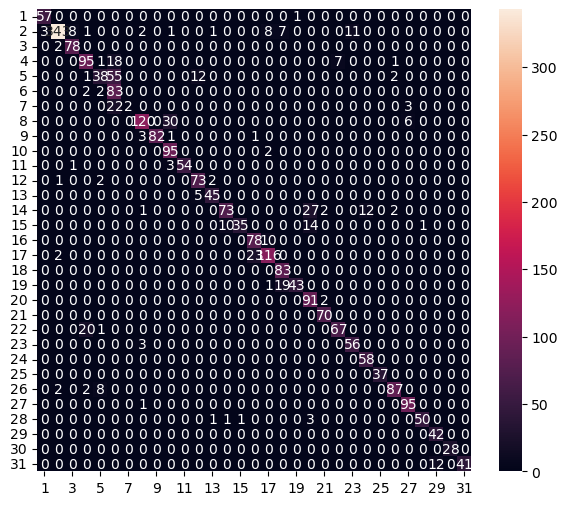

Classification Report
              precision    recall  f1-score   support

           1       0.95      0.98      0.97        58
           2       0.98      0.89      0.93       385
           3       0.90      0.97      0.93        80
           4       0.79      0.78      0.78       122
           5       0.73      0.35      0.47       108
           6       0.47      0.95      0.63        87
           7       1.00      0.07      0.14        27
           8       0.92      0.77      0.84       156
           9       1.00      0.94      0.97        87
          10       0.73      0.98      0.84        97
          11       1.00      0.93      0.96        58
          12       0.81      0.94      0.87        78
          13       0.92      0.90      0.91        50
          14       0.87      0.62      0.73       117
          15       0.97      0.58      0.73        60
          16       0.76      0.89      0.82        88
          17       0.85      0.82      0.83       141
     

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [100]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [101]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\hanas\AppData\Local\Temp\tmpumceshlw\assets


INFO:tensorflow:Assets written to: C:\Users\hanas\AppData\Local\Temp\tmpumceshlw\assets


Saved artifact at 'C:\Users\hanas\AppData\Local\Temp\tmpumceshlw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 32), dtype=tf.float32, name=None)
Captures:
  2188393236240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2188508107728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2188508108688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2188508115216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2188508118096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2188508110800: TensorSpec(shape=(), dtype=tf.resource, name=None)


7828

# Inference test

In [102]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\hanas\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [103]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [104]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [105]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 97.5 μs


In [106]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.1613366e-14 2.5071189e-05 1.0953668e-05 4.3295087e-05 1.2029192e-03
 1.3460985e-02 9.3920843e-04 1.3752416e-03 2.7961012e-03 8.4646595e-01
 1.0311465e-03 2.6708297e-02 4.7784837e-05 1.6262484e-05 2.0626509e-04
 1.9458754e-04 1.1498998e-02 8.1319211e-04 3.0485124e-03 9.9585648e-04
 6.0481489e-05 8.6260097e-06 3.6140691e-06 1.2638202e-06 3.8736846e-07
 2.9947935e-07 7.4429630e-04 8.8081755e-02 8.7022556e-10 1.9067290e-04
 4.9504513e-07 2.7466363e-05]
9
